In [1]:
# import the necessary packages
import imutils
import cv2

In [2]:
import matplotlib.pyplot as plt

def imshow(im, title=None):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

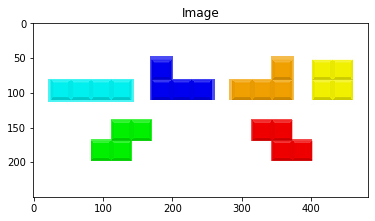

In [3]:
# load the input image (whose path was supplied via command line
# argument) and display the image to our screen
image = cv2.imread('data/tetris_blocks.png')
imshow(image, 'Image')

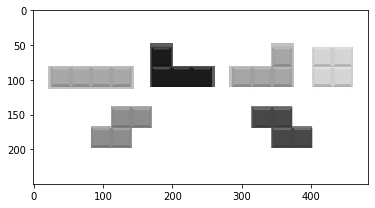

In [4]:
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(gray)

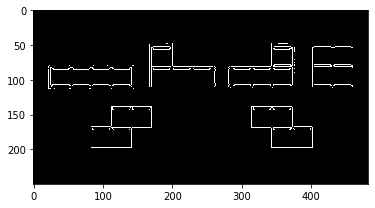

In [5]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, 30, 150)
imshow(edged)

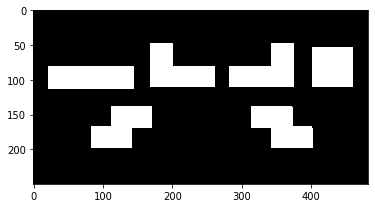

In [6]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
imshow(thresh)

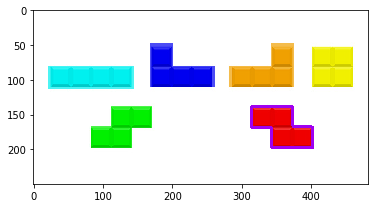

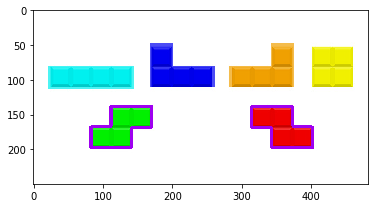

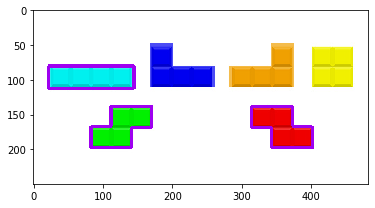

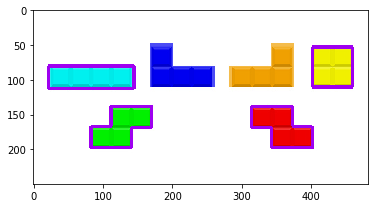

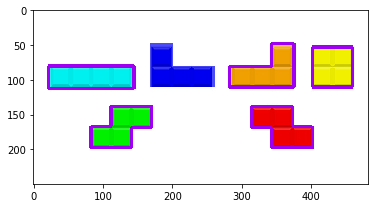

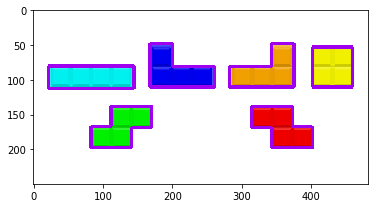

In [7]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

# loop over the contours
for c in cnts:
    # draw each contour on the output image with a 3px thick purple
    # outline, then display the output contours one at a time
    cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
    imshow(output)

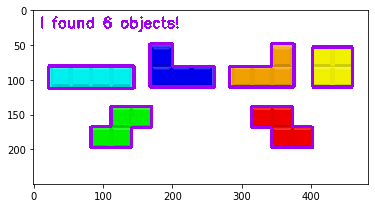

In [8]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
    (240, 0, 159), 2)
imshow(output)

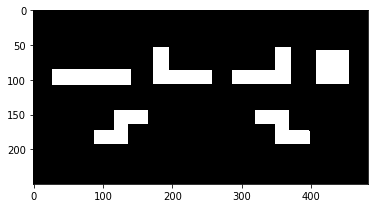

In [9]:
# we apply erosions to reduce the size of foreground objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
imshow(mask)

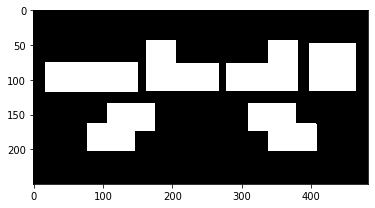

In [10]:
# similarly, dilations can increase the size of the ground objects
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
imshow(mask)

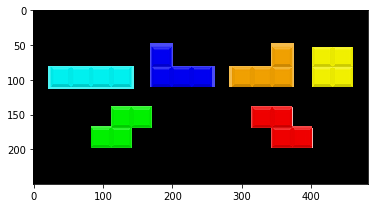

In [11]:
# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked
# regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
imshow(output)